In [2]:
import yfinance as yf

# Define the tickers
tickers = ['TSLA', 'BND', 'SPY']

# Fetch data for the specified date range
data = {ticker: yf.download(ticker, start="2015-01-01", end="2024-12-31") for ticker in tickers}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


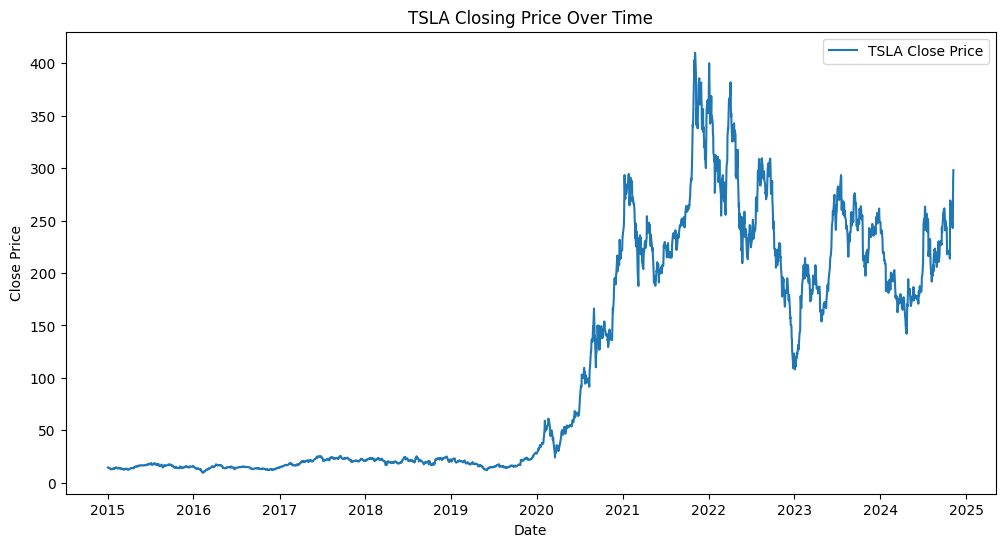

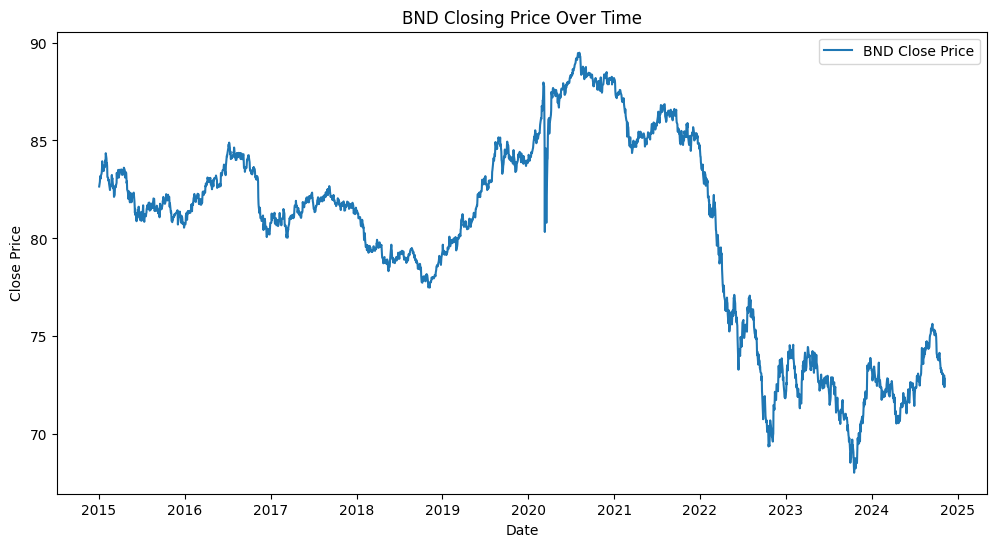

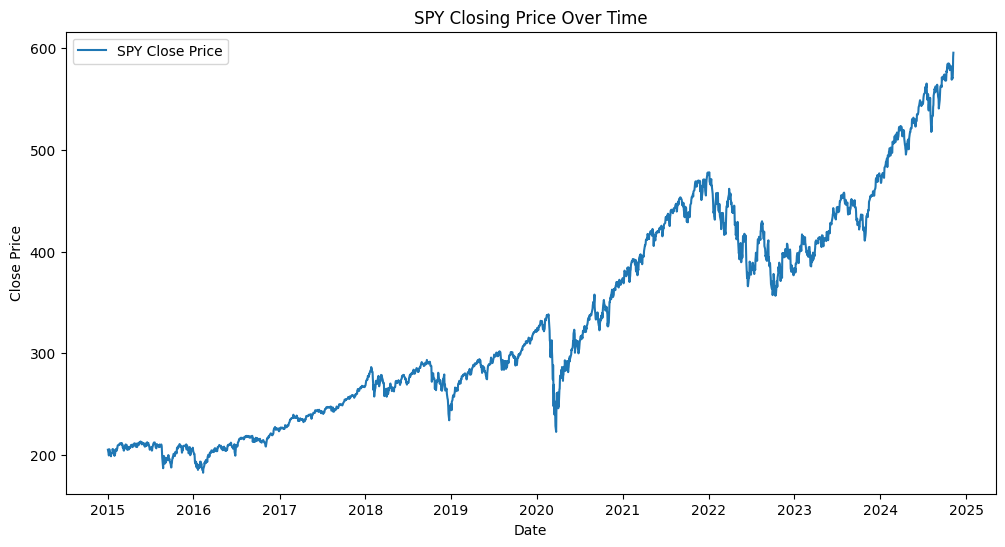

In [3]:
import matplotlib.pyplot as plt

for ticker, df in data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label=f'{ticker} Close Price')
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

In [4]:
for ticker, df in data.items():
    df['Daily Return'] = df['Close'].pct_change()
    df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
    df['Rolling Std'] = df['Close'].rolling(window=30).std()

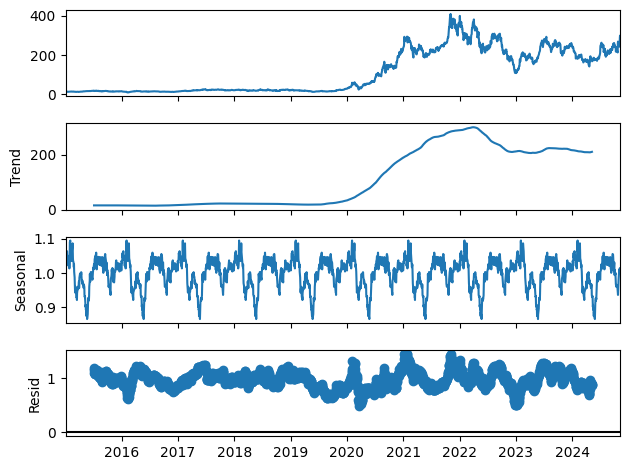

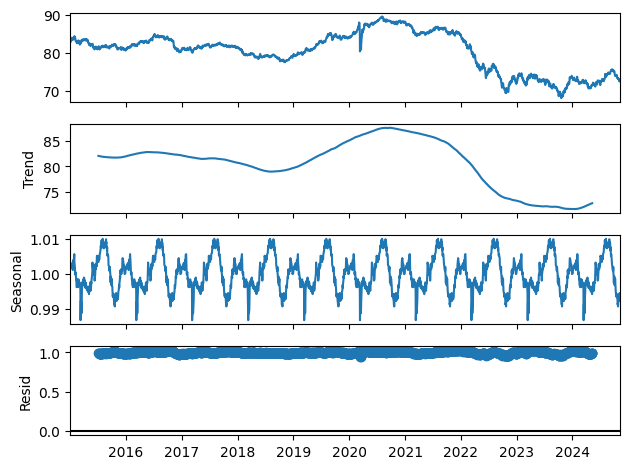

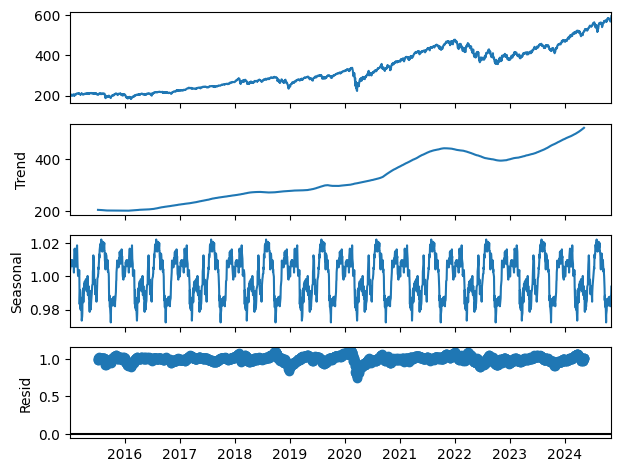

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

for ticker, df in data.items():
    decomposition = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=252)
    decomposition.plot()
    plt.show()

In [6]:
import numpy as np

def calculate_var(df, confidence_level=0.95):
    return np.percentile(df['Daily Return'].dropna(), 100 * (1 - confidence_level))

for ticker, df in data.items():
    var = calculate_var(df)
    print(f"{ticker} - Value at Risk (VaR) at 95% confidence level: {var}")

TSLA - Value at Risk (VaR) at 95% confidence level: -0.051240198541203555
BND - Value at Risk (VaR) at 95% confidence level: -0.0050937162680290355
SPY - Value at Risk (VaR) at 95% confidence level: -0.0168385542069614


In [7]:
def calculate_sharpe_ratio(df, risk_free_rate=0):
    mean_return = df['Daily Return'].mean()
    std_dev = df['Daily Return'].std()
    return (mean_return - risk_free_rate) / std_dev

for ticker, df in data.items():
    sharpe_ratio = calculate_sharpe_ratio(df)
    print(f"{ticker} - Sharpe Ratio: {sharpe_ratio}")

TSLA - Sharpe Ratio: 0.051765427328447446
BND - Sharpe Ratio: -0.012974082232158702
SPY - Sharpe Ratio: 0.04396749498084574
